## Aula 6 - Gradientes de Imagem

Os filtros de passa-alta têm como objetivo realçar variações bruscas de pixels, que são as regiões de borda.

Iremos ver os seguintes filtros:

- Sobel
- Scharr
- Laplaciano
- Canny Edge

Vamos importar as bibliotecas necessárias:

In [8]:
%matplotlib inline
import cv2 # OpenCV
import matplotlib.pyplot as plt # Matplotlib
import numpy as np # Numpy
from scipy import ndimage
from ipywidgets import interact

!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/lenna.jpg

--2021-06-09 12:23:06--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/lenna.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/jpeg]
Saving to: ‘lenna.jpg.2’

lenna.jpg.2         100%[===================>] 462.73K  --.-KB/s    in 0.05s   

2021-06-09 12:23:06 (9.93 MB/s) - ‘lenna.jpg.2’ saved [473831/473831]



E agora, vamos carregar a imagem da Lenna:

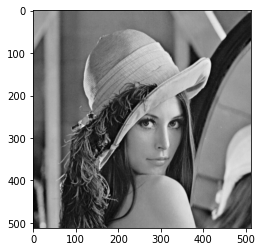

In [68]:
img = cv2.imread('lenna.jpg',0)
plt.imshow(img, cmap='gray')

### 6.1 - Sobel

Usaremos o método [cv.Sobel()](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d), que já está implementado no OpenCV, para calcular o Sobel em X, o Sobel em Y, e depois vamos realizar a soma para visualizar a imagem resultante. Os principais parâmetros que devem ser passados para o método são:

1. **src**: A imagem
2. [**ddepth**](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=sobel#cv2.Sobel): Controla a profundidade da imagem resultante, não em quantidade de canais, mas em tipo de dado. O padrão é definir como **CV_8U**, que é o equivalente a **np.uint8** - uma imagem com 8 bits do tipo *unsigned* (0-255)
3. **dx**: Ordem da derivada de x
4. **dy**: Ordem da derivada de y
5. **ksize**: Dimensão da janela de convolução

Tipo de dados para:
Sobel (X): uint8	Sobel(Y): uint8


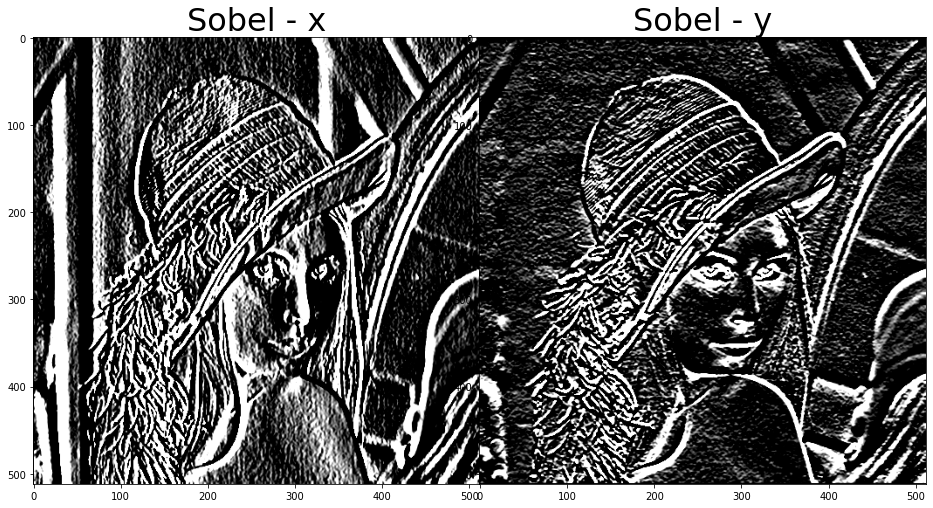

In [71]:
img_sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=5)

fig, ax = plt.subplots(1, 2, figsize=(16, 9))
fig.subplots_adjust(hspace=0, wspace=0)
ax[0].set_title("Sobel - x", fontsize=32)
ax[0].imshow(img_sobelx, cmap='gray')
ax[1].set_title("Sobel - y", fontsize=32)
ax[1].imshow(img_sobely, cmap='gray')

print("Tipo de dados para:\nSobel (X): %s\tSobel(Y): %s" % (img_sobelx.dtype, img_sobely.dtype))

Qual seria o resultado se usarmos o **ddepth** com um valor maior?

Tipo de dados para:
Sobel (X): float64	Sobel(Y): float64


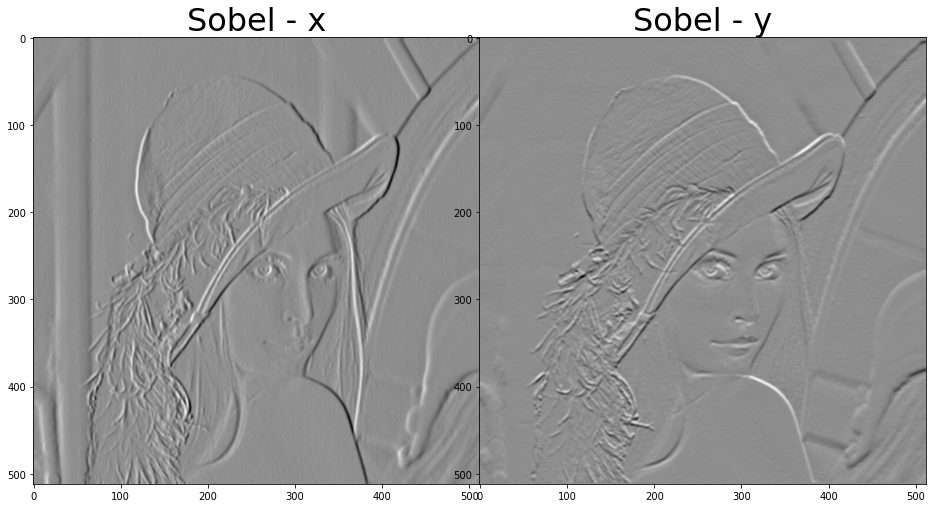

In [72]:
img_sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
img_sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

fig, ax = plt.subplots(1, 2, figsize=(16, 9))
fig.subplots_adjust(hspace=0, wspace=0)
ax[0].set_title("Sobel - x", fontsize=32)
ax[0].imshow(img_sobelx, cmap='gray')
ax[1].set_title("Sobel - y", fontsize=32)
ax[1].imshow(img_sobely, cmap='gray')
print("Tipo de dados para:\nSobel (X): %s\tSobel(Y): %s" % (img_sobelx.dtype, img_sobely.dtype))

Conseguimos ver que os tipos são diferentes. Vamos escolher um elemento aleatório e compará-lo:

In [73]:
print(cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)[0][10], cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)[0][10])

0 -112.0


Podemos ver que o valor em **(0, 10)** da versão da imagem em uint8 é 0, enquanto o valor na versão da imagem em float64 é -112. Essa perda de informação pode ser prejudicial durante o processo, portanto é necessário atentar para o tipo de dado a ser usado.

Vamos somar os gradientes e ver o resultado final:

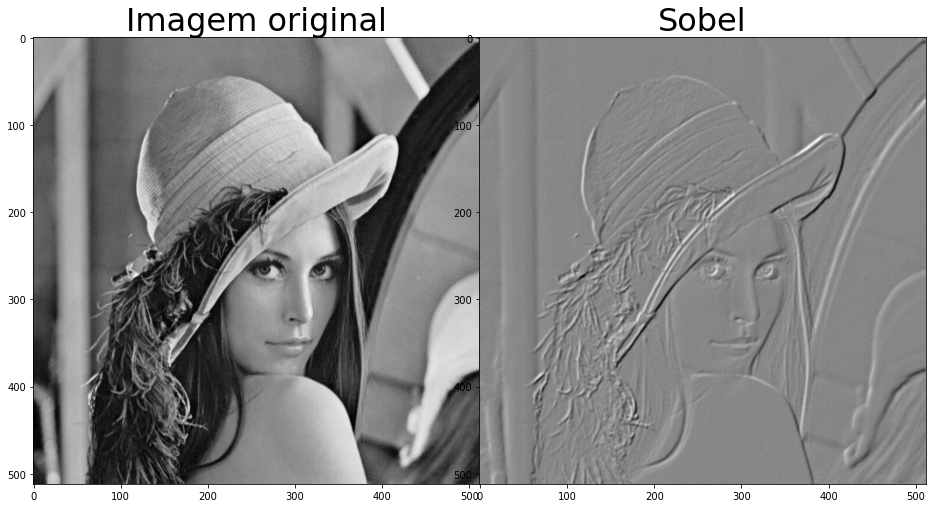

In [76]:
img_sobel = img_sobelx + img_sobely

fig, ax = plt.subplots(1, 2, figsize=(16, 9))
fig.subplots_adjust(hspace=0, wspace=0)
ax[0].set_title("Imagem original", fontsize=32)
ax[0].imshow(img, cmap='gray')
ax[1].set_title("Sobel", fontsize=32)
ax[1].imshow(img_sobel, cmap='gray')

Podemos brincar com o argumento **ksize** para obtermos resultados diferentes, e também a possibilidade de aplicar um leve blur na imagem antes:

In [77]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

@interact(ddepth={'CV_8U': cv2.CV_8U, 'CV_16U': cv2.CV_16U, 'CV_32F': cv2.CV_32F, 'CV_64F': cv2.CV_64F}, 
          k = (1, 7, 2))
def sobel_operator(ddepth, k):
  fig, ax = plt.subplots(1, 2, figsize=(16, 9))
  fig.subplots_adjust(hspace=0, wspace=0)
  
  img_sobel = cv2.Sobel(img, ddepth, 1, 0, ksize=k) + \
              cv2.Sobel(img, ddepth, 0, 1, ksize=k)
  
  ax[0].set_title("Imagem original", fontsize=32)
  ax[0].imshow(img, cmap='gray')
  ax[1].imshow(img_sobel, cmap='gray')
  ax[1].set_title(f'Sobel - ({k}x{k})', fontsize=32)

interactive(children=(Dropdown(description='ddepth', options={'CV_8U': 0, 'CV_16U': 2, 'CV_32F': 5, 'CV_64F': …

### 6.2 - Scharr

O Scharr pode ser usado tanto pelo método [Scharr()](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gaa13106761eedf14798f37aa2d60404c9) como pelo caso especial do Sobel. Podemos definir o ksize=-1 para aplicar o método. Mais detalhes estão na documentação do método [Sobel()](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d).

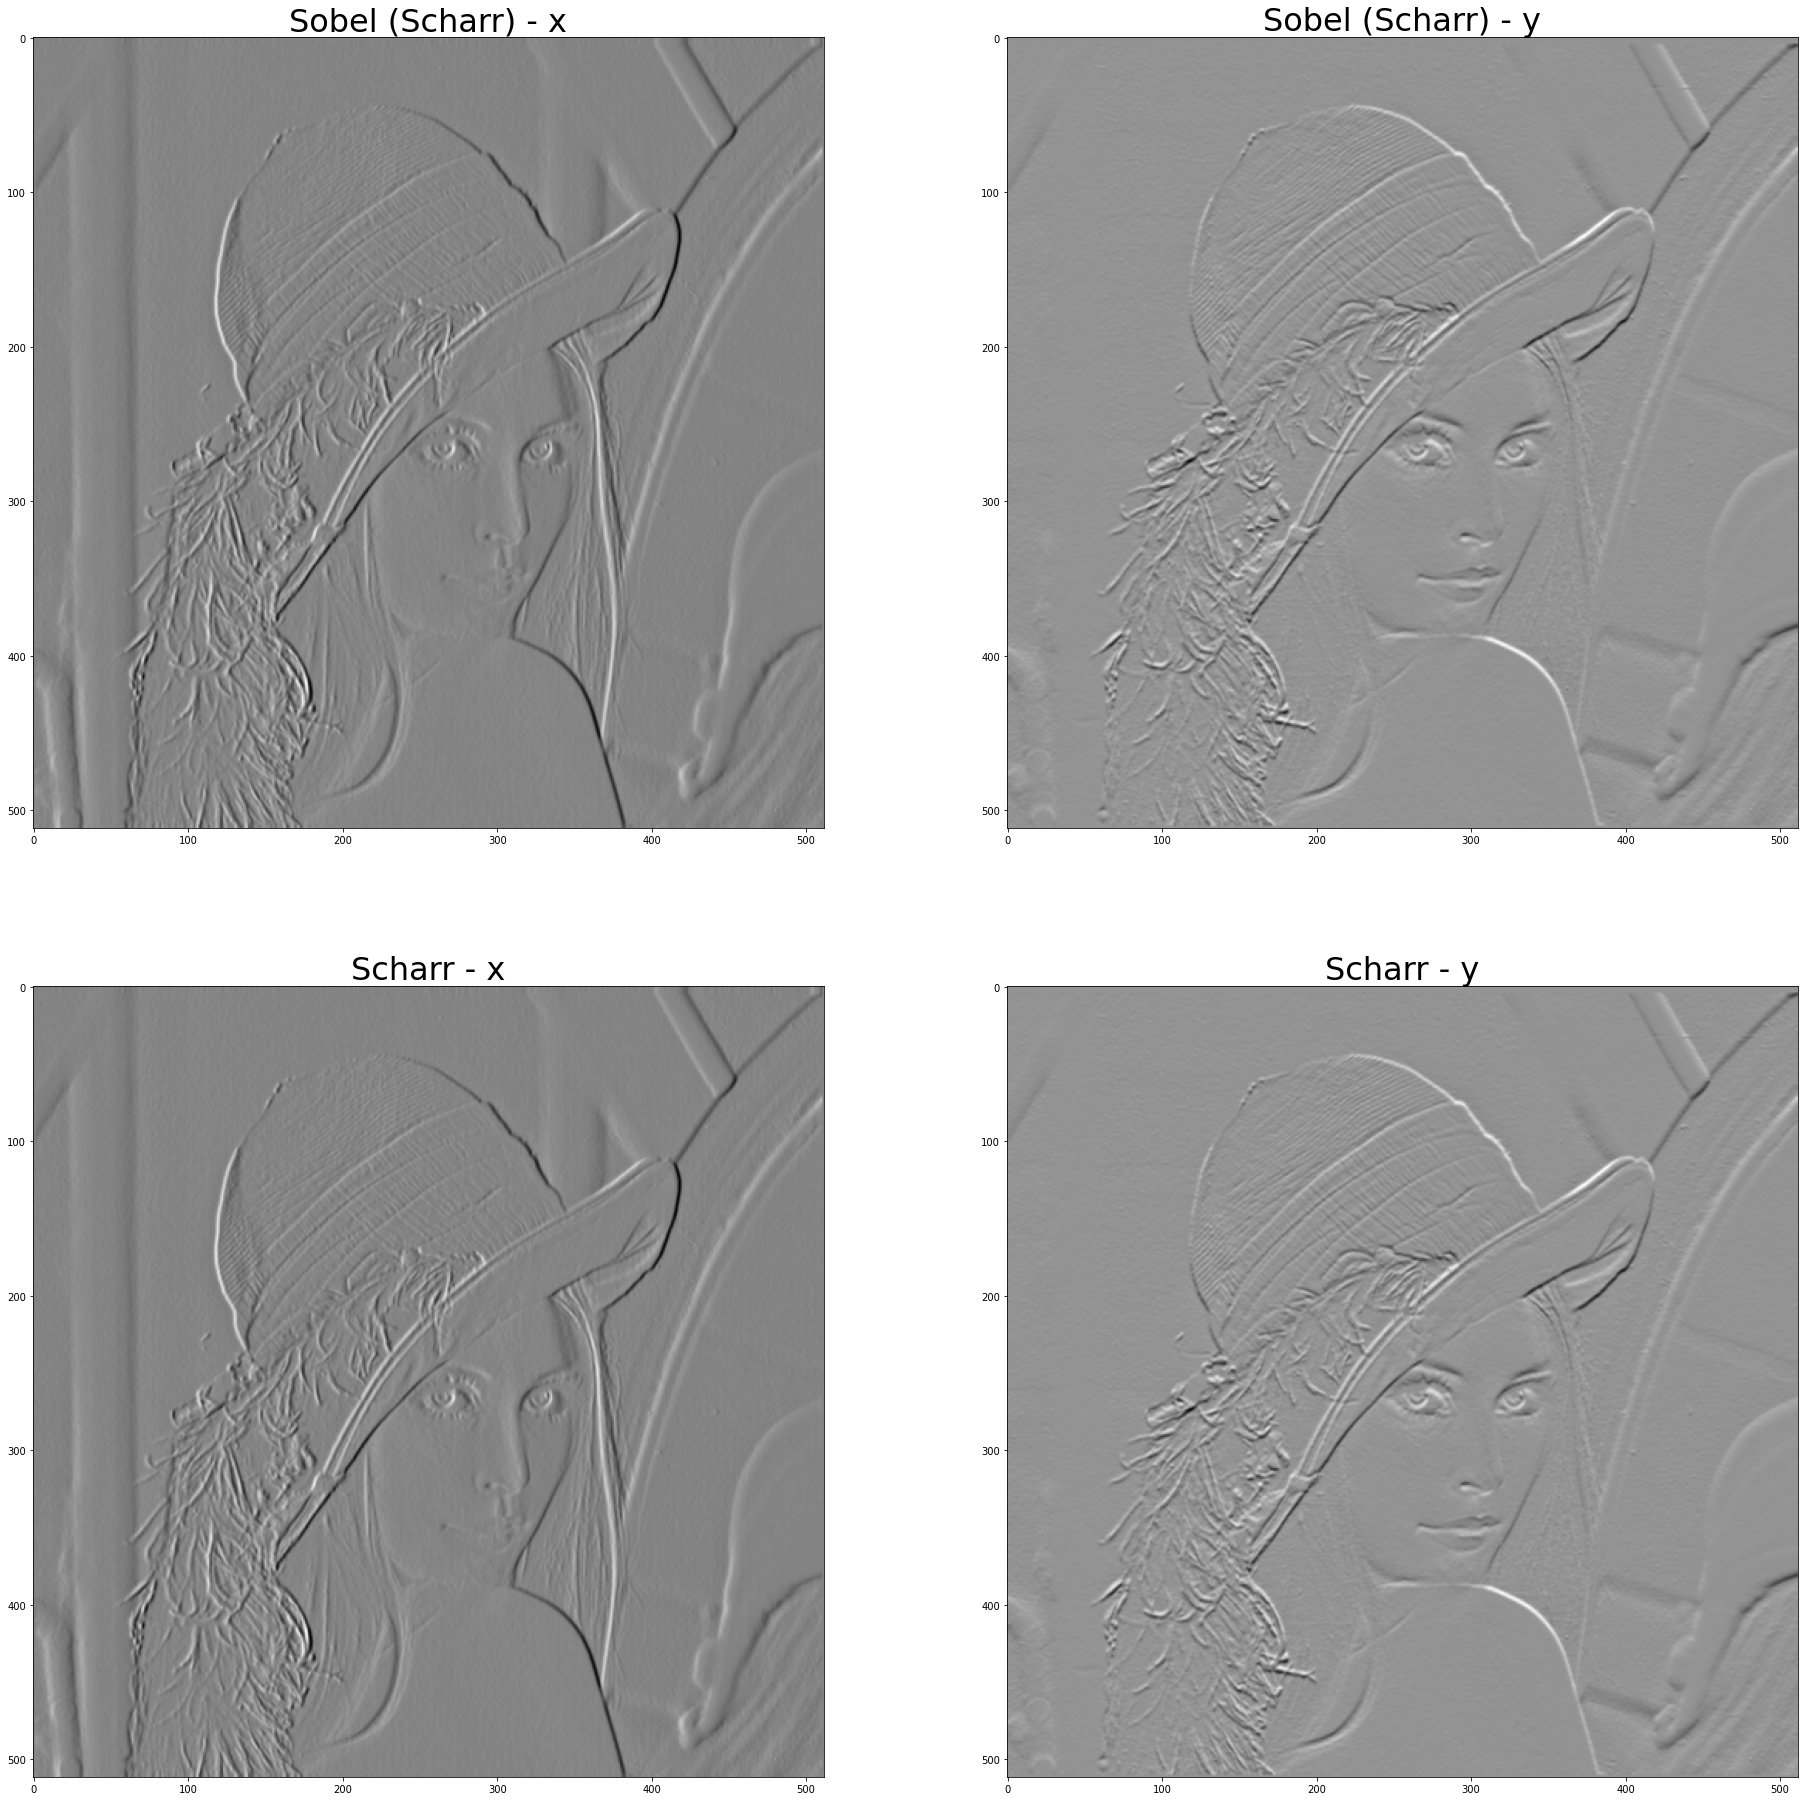

In [81]:
img_sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=-1)
img_sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=-1)

img_scharrx = cv2.Scharr(img,cv2.CV_64F,1,0)
img_scharry = cv2.Scharr(img,cv2.CV_64F,0,1)

fig, ax = plt.subplots(2, 2, figsize=(32, 32))
ax[0, 0].set_title("Sobel (Scharr) - x", fontsize=32)
ax[0, 0].imshow(img_sobelx, cmap='gray')
ax[0, 1].set_title("Sobel (Scharr) - y", fontsize=32)
ax[0, 1].imshow(img_sobely, cmap='gray')

ax[1, 0].set_title("Scharr - x", fontsize=32)
ax[1, 0].imshow(img_scharrx, cmap='gray')
ax[1, 1].set_title("Scharr - y", fontsize=32)
ax[1, 1].imshow(img_scharry, cmap='gray')

Será que as duas imagens são realmente iguais?

In [82]:
(img_sobelx == img_scharrx).all()

True

### 6.3 - Laplaciano

A execução do filtro laplaciano é simples através do método [Laplacian()](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6). Vamos ver um exemplo abaixo:

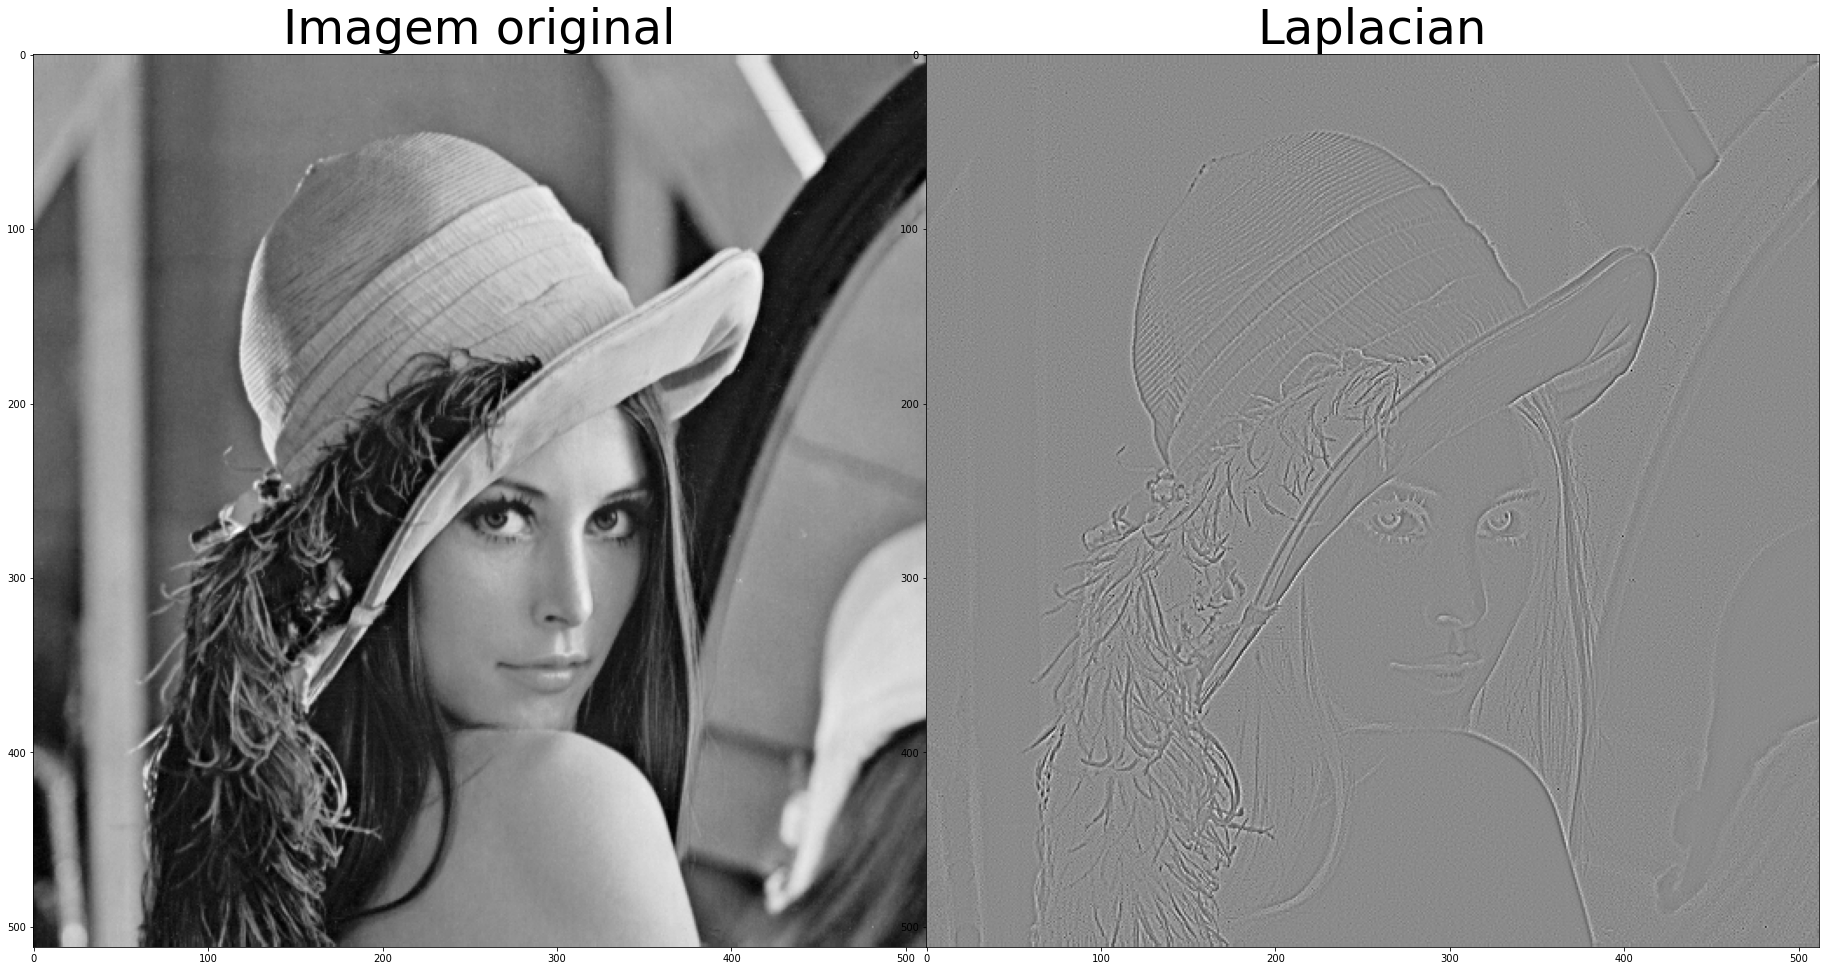

In [83]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)
fig, ax = plt.subplots(1, 2, figsize=(32, 32))
fig.subplots_adjust(hspace=0, wspace=0)
ax[0].set_title("Imagem original", fontsize=48)
ax[0].imshow(img, cmap='gray')
ax[1].set_title("Laplacian", fontsize=48)
ax[1].imshow(laplacian, cmap='gray')

O resultado não foi muito satisfatório. Vamos aplicar um borramento na imagem e tentar novamente:

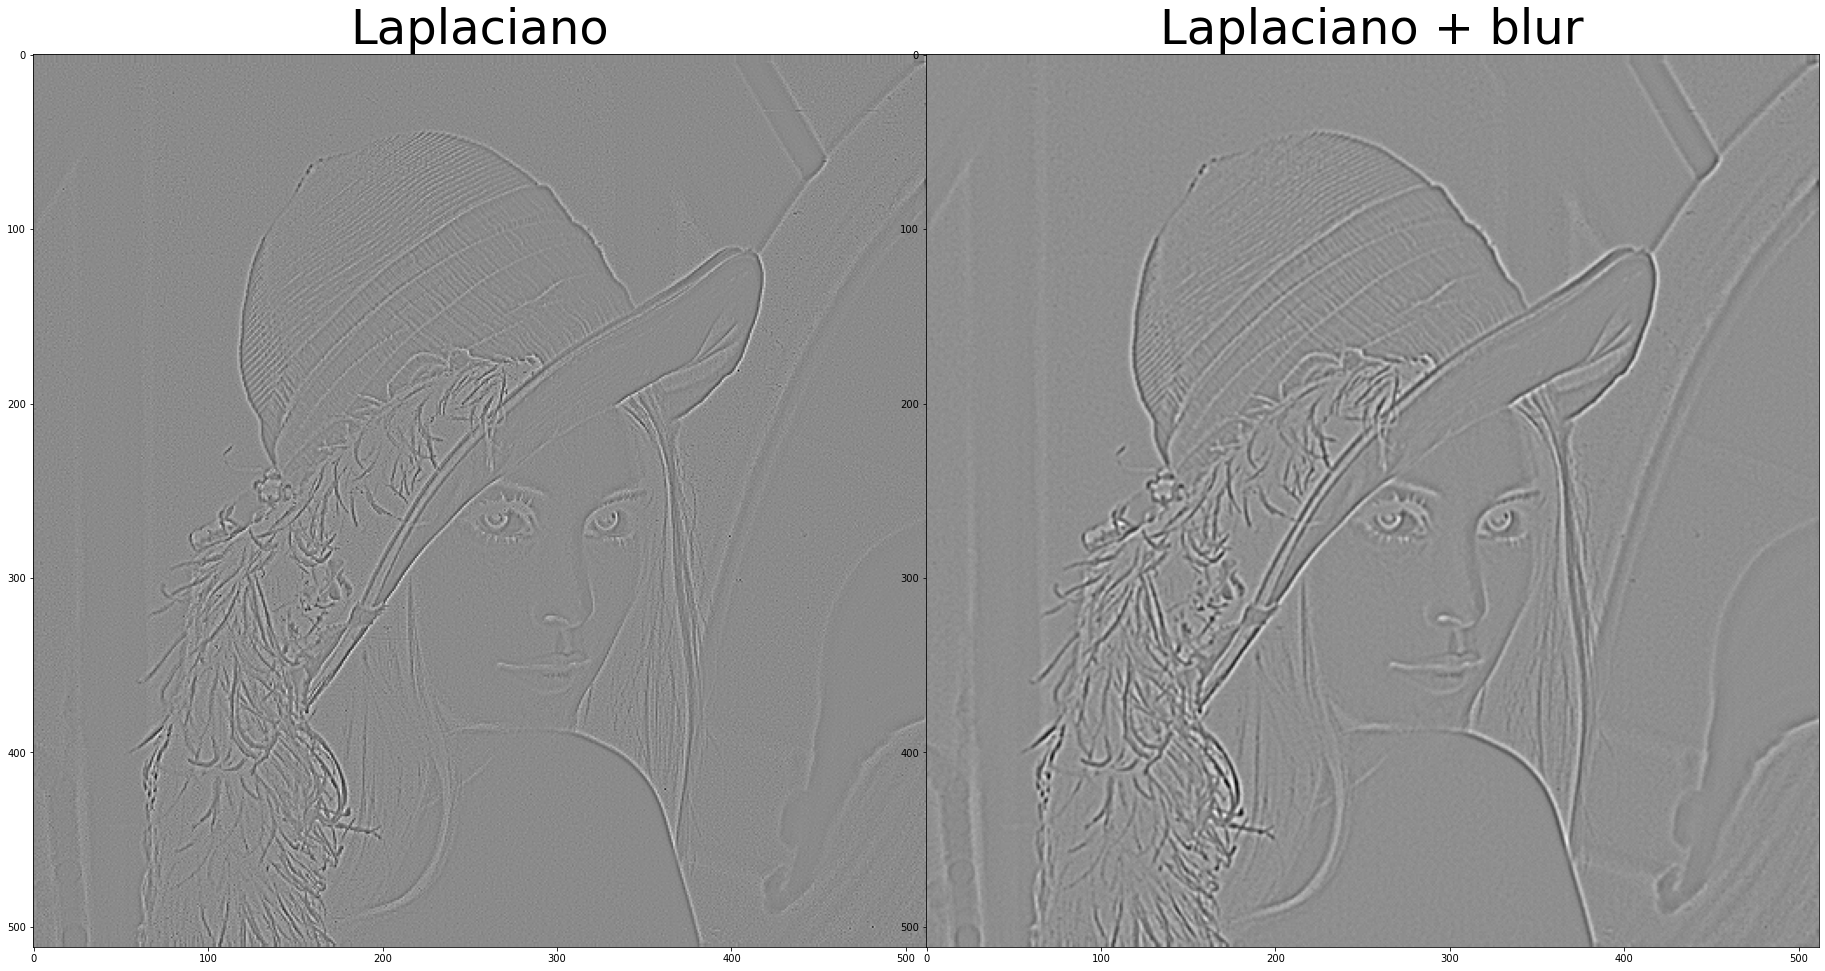

In [84]:
img_b = cv2.GaussianBlur(img, (3, 3), 0)
laplacian_ = cv2.Laplacian(img_b, cv2.CV_64F)

fig, ax = plt.subplots(1, 2, figsize=(32, 32))
fig.subplots_adjust(hspace=0, wspace=0)
ax[0].set_title("Laplaciano", fontsize=48)
ax[0].imshow(laplacian, cmap='gray')
ax[1].set_title("Laplaciano + blur", fontsize=48)
ax[1].imshow(laplacian_, cmap='gray')

### 6.4 - Canny edge

Usaremos o [Canny()](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de) para aplicar o Canny edge. Precisaremos definir dois thresholds: o *minVal* e o *maxVal*. Uma recomendação é definir maxVal = minVal\*3. No exemplo abaixo, vamos aplicar o Canny e usar os sliders para definir os thresholds. O botão é responsável por ativar ou desativar a recomendação dada anteriormente:

In [92]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display


@interact(min_val=(0, 100), blur=True)
def canny_slider(min_val, blur):
  fig, ax = plt.subplots(1, 2, figsize=(32, 32))
  max_val = min_val * 3
  if blur:
    blur = cv2.GaussianBlur(img, (3, 3), 0)
    det_edges = cv2.Canny(blur, min_val, max_val)
    ax[0].set_title("Image original", fontsize=32)
    ax[0].imshow(img, cmap='gray')
    ax[1].set_title(f'Canny - ({min_val} - {max_val}) - with blur', fontsize=32)
    ax[1].imshow(det_edges, cmap='gray')
  else:
    det_edges = cv2.Canny(img, min_val, max_val)
    ax[0].set_title("Image original", fontsize=32)
    ax[0].imshow(img, cmap='gray')
    ax[1].set_title(f'Canny - ({min_val} - {max_val})', fontsize=32)
    ax[1].imshow(det_edges, cmap='gray')

interactive(children=(IntSlider(value=50, description='min_val'), Checkbox(value=True, description='blur'), Ou…